In [29]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
import pandas as pd
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [3]:
filmscript=pd.read_csv('cleaned_pudding_public_scripts.csv')

In [4]:
filmscript_10=filmscript.sample(n=10)
films_year=filmscript.groupby('year')
filmscript_1992=films_year.get_group(1992)
filmscript_2002=films_year.get_group(2000)

In [5]:
# all script unique words
documents = filmscript.script.tolist() #to list is a built in method--turns a column to a list
vectorizer = TfidfVectorizer(max_df=.7, min_df=1, stop_words=stop_words)  #way of transforming data--representing text through their frequencies
transformed_documents = vectorizer.fit_transform(documents)
transformed_documents_as_array = transformed_documents.toarray()
links = filmscript.link.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names_out(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df['links'] = links[counter]
    tfidf_results.append(one_doc_as_df)
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by=['score'], ascending=False)
# tfidf_df.head(10)
# tfidf_df[0:10]

In [6]:
tfidf_df[50:70]

,term,score,links
0,alice,0.811776,http://www.dailyscript.com/scripts/A-Nightmare...
0,kimberly,0.810717,http://www.dailyscript.com/scripts/final_desti...
0,maya,0.810328,http://www.horrorlair.com/scripts/lostsouls.txt
0,laurie,0.809703,http://www.dailyscript.com/scripts/halloween.html
0,amy,0.809503,http://www.dailyscript.com/scripts/cursecat.htm
0,bernie,0.808757,http://www.dailyscript.com/scripts/hero1.html
0,erik,0.806098,http://www.dailyscript.com/scripts/erik_the_vi...
0,eddie,0.804175,"http://www.dailyscript.com/scripts/Hustler,+Th..."
0,carter,0.803252,http://www.dailyscript.com/scripts/rush_hour.html
0,welles,0.801022,http://www.dailyscript.com/scripts/RKO218.html


In [7]:
#random 10 scripts most unique words
documents_10 = filmscript_10.script.tolist() 
vectorizer_10 = TfidfVectorizer(max_df=.7, min_df=1, stop_words=stop_words)  
transformed_documents_10 = vectorizer_10.fit_transform(documents_10)
transformed_documents_as_array_10 = transformed_documents_10.toarray()
links_10 = filmscript_10.link.tolist()
tfidf_results_10 = []
for counter_10, doc in enumerate(transformed_documents_as_array_10):
    tf_idf_tuples_10 = list(zip(vectorizer_10.get_feature_names_out(), doc))
    one_doc_as_df_10 = pd.DataFrame.from_records(tf_idf_tuples_10, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df_10['link'] = links_10[counter_10]
    tfidf_results_10.append(one_doc_as_df_10)
tfidf_df_10 = pd.concat(tfidf_results_10)
tfidf_df_10 = tfidf_df_10.sort_values(by=['score'], ascending=False)
# tfidf_df_10.head(10)
    

In [8]:
#10 most unique words from each movie from the randomized 10 list
listscript_10=list(filmscript_10.link.unique())
for links in listscript_10:
    rows=tfidf_df_10[tfidf_df_10.link==links].sort_values(by=['score'], ascending=False)[:10]
#     print(rows[['link', 'term', 'score']])

In [9]:
#most unique words words from 1992
documents_92 = filmscript_1992.script.tolist()
vectorizer_92 = TfidfVectorizer(max_df=.7, min_df=1, stop_words=stop_words) 
transformed_documents_92 = vectorizer_92.fit_transform(documents_92)
transformed_documents_as_array_92 = transformed_documents_92.toarray()
link_92 = filmscript_1992.link.tolist()
tfidf_results_92 = []
for counter, doc in enumerate(transformed_documents_as_array_92):
    tf_idf_tuples_92 = list(zip(vectorizer_92.get_feature_names_out(), doc))
    one_doc_as_df_92 = pd.DataFrame.from_records(tf_idf_tuples_92, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df_92['links'] = link_92[counter]
    tfidf_results_92.append(one_doc_as_df_92)
tfidf_df_92 = pd.concat(tfidf_results_92)
tfidf_df_92 = tfidf_df_92.sort_values(by=['score'], ascending=False)
# tfidf_df_92.head(10)
# tfidf_df_92[0:10]

In [10]:
#10 most unique words of each movie from 1992
listscript_92=list(filmscript_1992.link.unique())
listscript_92
for links in listscript_92:
    rows=tfidf_df_92[tfidf_df_92.links==links].sort_values(by=['score'], ascending=False)[:10]
#     print(rows[['links','term', 'score']])

In [11]:
#most unique words of 2002
documents_02 = filmscript_2002.script.tolist()
vectorizer_02 = TfidfVectorizer(max_df=.7, min_df=1, stop_words=stop_words) 
transformed_documents_02 = vectorizer_02.fit_transform(documents_02)
transformed_documents_as_array_02 = transformed_documents_02.toarray()
link_02 = filmscript_2002.link.tolist()
tfidf_results_02 = []
for counter, doc in enumerate(transformed_documents_as_array_02):
    tf_idf_tuples_02 = list(zip(vectorizer_02.get_feature_names_out(), doc))
    one_doc_as_df_02 = pd.DataFrame.from_records(tf_idf_tuples_02, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df_02['links'] = link_02[counter]
    tfidf_results_02.append(one_doc_as_df_02)
tfidf_df_02 = pd.concat(tfidf_results_02)
tfidf_df_02 = tfidf_df_02.sort_values(by=['score'], ascending=False)
# tfidf_df_02.head(10)
# tfidf_df_02[0:10]

In [12]:
#10 most unique words of each movie from 2002
listscript_02=list(filmscript_2002.link.unique())
listscript_02
for links in listscript_02:
    rows=tfidf_df_02[tfidf_df_02.links==links].sort_values(by=['score'], ascending=False)[:10]
#     print(rows[['links','term', 'score']])

In [22]:
def overtime(row, term):
    counts=row['script'].count(term)
    return counts 

In [35]:
pd.options.mode.chained_assignment = None  # default='warn'

test=filmscript[0:1]
filmscript['dude_count']=filmscript.apply(overtime, axis=1, term='dude')

<AxesSubplot:xlabel='year', ylabel='dude_count'>

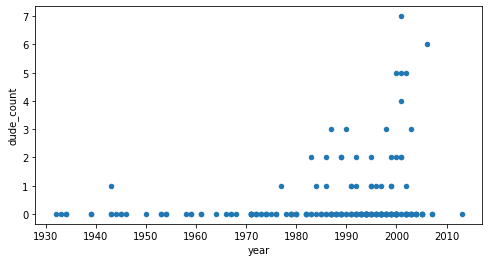

In [41]:
filmscript.plot(x='year', y='dude_count', kind='scatter', figsize=(8, 4))